In [1]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
temp_june = (extract('month', Measurement.date) == 6)

results = []

#results = (Measurement.date, Measurement.tobs).\
    #filter(extract('month',Measurement.date)== 0)

results = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date, temp_june).all()




In [5]:
#  3. Convert the June temperatures to a list.

june = list(np.ravel(results))
#print(june)


In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(results, columns = ["date",'June_Temps'])

june_df.set_index(df['date'], inplace = True)

june_df['June_Temps'].head()




NameError: name 'df' is not defined

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June_Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
temp_december = (extract('month', Measurement.date) == 12)

dec_results = []

#results = (Measurement.date, Measurement.tobs).\
    #filter(extract('month',Measurement.date)== 0)

dec_results = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date, temp_december).all()

In [9]:
# 7. Convert the December temperatures to a list.

december = list(np.ravel(results))

In [16]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_results, columns=["Date","Dec_Temp"])
dec_df.set_index(dec_df['Date'], inplace = True)

dec_df['Dec_Temp'].head()

Date
2010-12-01    76.0
2010-12-03    74.0
2010-12-04    74.0
2010-12-06    64.0
2010-12-07    64.0
Name: Dec_Temp, dtype: float64

In [17]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,Dec_Temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [18]:
dec_df = dec_df.sort_index()


<AxesSubplot:ylabel='Frequency'>

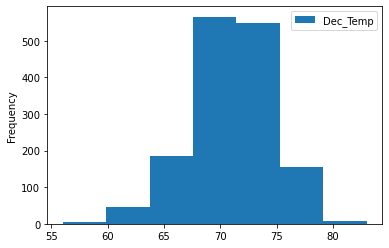

In [27]:

dec_df.plot.hist(bins = 7)

In [20]:
june_df = june_df.sort_index()


<AxesSubplot:ylabel='Frequency'>

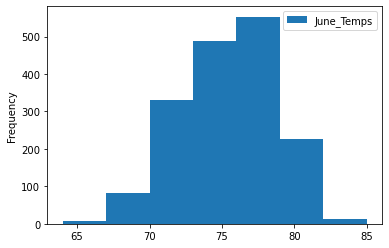

In [28]:
june_df.plot.hist(bins = 7)